In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Upload 'pic3.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [2]:
img = cv2.imread("pic3.png")
img.shape

(416, 620, 3)

In [3]:
import math

def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    no_rows = math.floor(k*img.shape[0])
    no_colms = math.floor(k*img.shape[1])
    no_channels = img.shape[2]
    out_img = np.zeros((no_rows, no_colms, no_channels), dtype=np.uint8) # Intialise with blank display 
    for m in range(no_channels):
      for n in range(no_rows):
        for o in range(no_colms):
          out_img[n][o][m] = img[math.floor(n/k)][math.floor(o/k)][m]
    return out_img

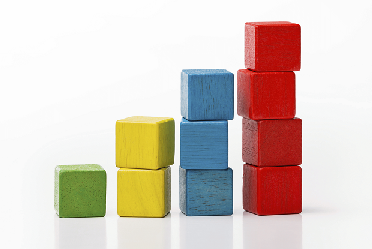

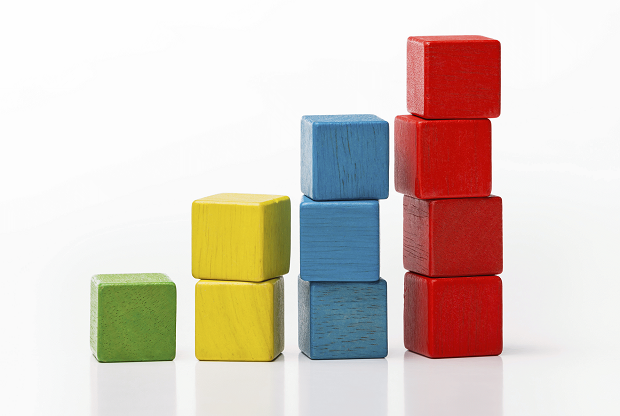

In [4]:
output1 = resize_nn(img, 0.6)
cv2_imshow(output1)
cv2_imshow(img)


In [5]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    no_rows = math.floor(k*img.shape[0])
    no_colms = math.floor(k*img.shape[1])
    no_channels = img.shape[2]
    out_img = np.zeros((no_rows, no_colms, no_channels), dtype=np.uint8) # Intialise with blank display 
    for m in range(no_channels):
      for n in range(no_rows):
        for o in range(no_colms):
          frac1 = n/k
          frac2 = o/k
          if math.floor(frac1) == frac1 and math.floor(frac2) == frac2:
            out_img[n][o][m] = img[math.floor(n/k)][math.floor(o/k)][m] 

          if math.floor(frac1) != frac1 and math.floor(frac2) == frac2:
            r1 = frac1 - math.floor(frac1)
            r2 = math.ceil(frac1) - frac1
            out_img[n][o][m] = r2 * img[math.floor(frac1)][int(frac2)][m] + r1 * img[math.ceil(frac1)][int(frac2)][m]

          if math.floor(frac1) == frac1 and math.floor(frac2) != frac2:
            r1 = frac2 - math.floor(frac2)
            r2 = math.ceil(frac2) - frac2
            out_img[n][o][m] = r2 * img[int(frac1)][math.floor(frac2)][m] + r1 * img[int(frac1)][math.ceil(frac2)][m]

          if math.floor(frac1) != frac1 and math.floor(frac2) != frac2:
            r1 = frac1 - math.floor(frac1)
            r2 = math.ceil(frac1) - frac1
            r3 = frac2 - math.floor(frac2)
            r4 = math.ceil(frac2) - frac2
            tmp1 = r4 * img[math.floor(frac1)][math.floor(frac2)][m] + r3 * img[math.floor(frac1)][math.ceil(frac2)][m]
            tmp2 = r4 * img[math.ceil(frac1)][math.floor(frac2)][m] + r3 * img[math.ceil(frac1)][math.ceil(frac2)][m]
            out_img[n][o][m] = r2 * tmp1 + r1 * tmp2
    return out_img

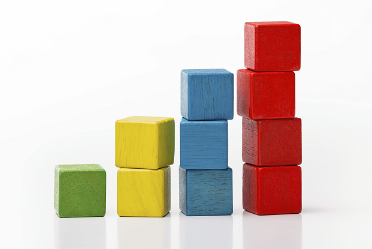

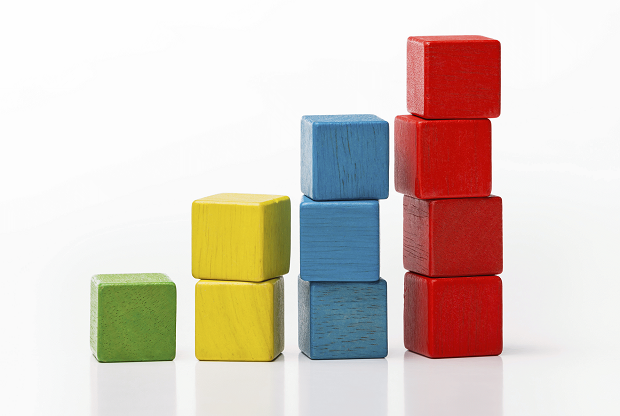

In [6]:
output1 = resize_bilinear(img, 0.6)
cv2_imshow(output1)
cv2_imshow(img)

# Checking the output:

Resize the image by utilizing output1 and output2 in the code block below and plot the original and resized images side by side in both cases.


<Figure size 432x288 with 0 Axes>

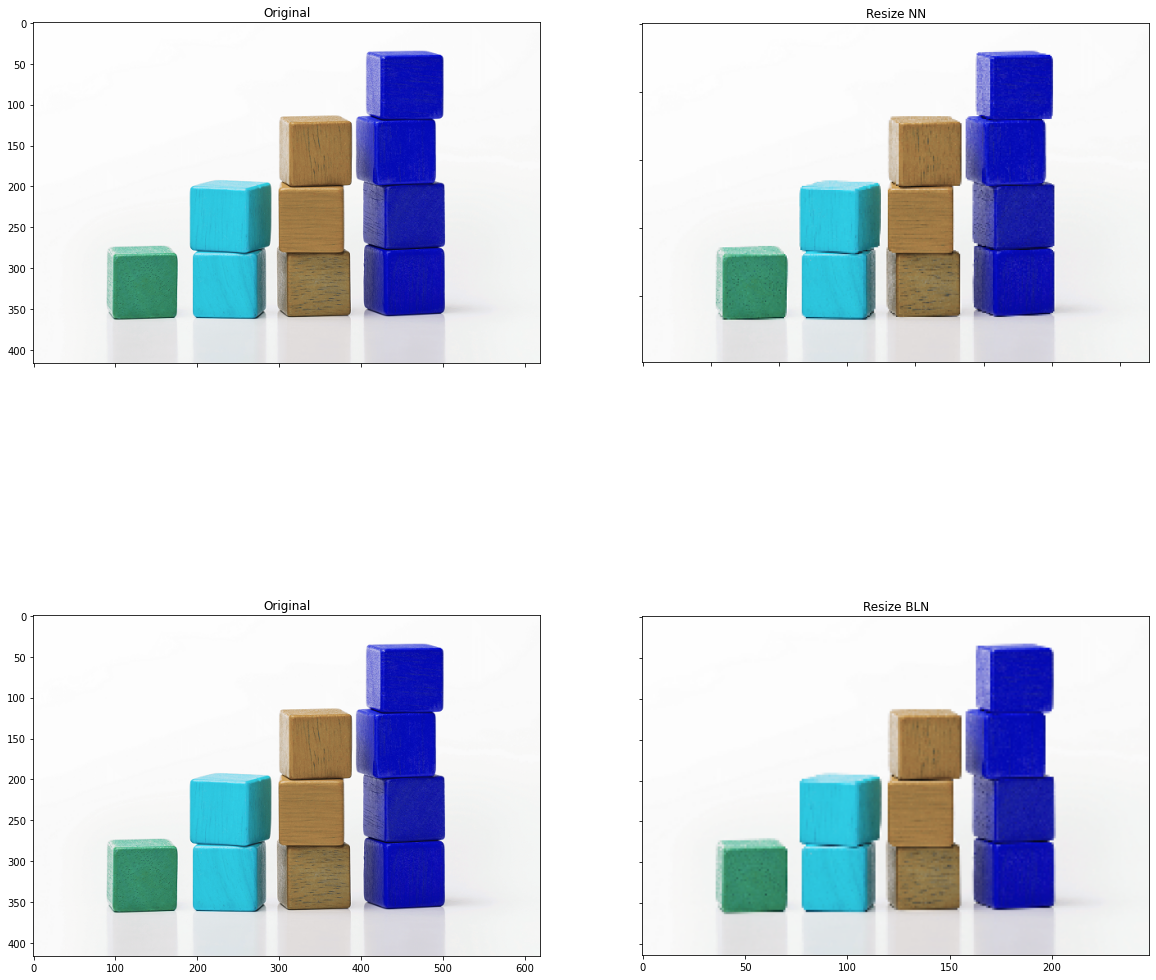

In [17]:
output1 = resize_nn(img, k=0.6)

output2 = resize_bilinear(img, k=0.4) 

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,2, figsize=(20,20)) 

axarr[0, 0].imshow(img)
axarr[0, 0].set_title('Original')
axarr[0, 1].imshow(output1)
axarr[0, 1].set_title('Resize NN')
axarr[1, 0].imshow(img)
axarr[1, 0].set_title('Original')
axarr[1, 1].imshow(output2)
axarr[1, 1].set_title('Resize BLN')

for ax in axarr.flat:
    ax.label_outer()

# use th
#axarr[0].imshow(img)
#axarr[1].imshow(output1)
#axarr[2].imshow(img)
#axarr[3].imshow(output2)



In [18]:
your_observation = """
1. As compared to original image, image reconstructed my NN finds inconsistency at edges, Edges of the cubes are not so clean like original image.

2. As compared to original image, image reconstructed my Bilinear interpolation also finds inconsistency at edges. Here also edges are blurred.

3. The edges in NN reconstructed image are sharper whereas image reconstructed by Bilinear interpolation are smooth at edges.

4. Computational time for Bilinear interpolation is more as compared to NN interpolation.

5. Small Black spots on faces of cube (brown ones) are highly smoothed (blurred) in case of Bilinear interpolation.

"""

print(your_observation)


1. As compared to original image, image reconstructed my NN finds inconsistency at edges, Edges of the cubes are not so clean like original image.

2. As compared to original image, image reconstructed my Bilinear interpolation also finds inconsistency at edges. Here also edges are blurred.

3. The edges in NN reconstructed image are sharper whereas image reconstructed by Bilinear interpolation are smooth at edges.

4. Computational time for Bilinear interpolation is more as compared to NN interpolation.

5. Small Black spots on faces of cube (brown ones) are highly smoothed (blurred) in case of Bilinear interpolation.


